<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Breast_Cancer_Dataset_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Dataset Classifier**

The following link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data contains data that correlates the features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It is used to classify the mass as either benign (B) or malignant (M).

You are required to implement a 3-layer neural network to classify a breast mass sample based on this dataset. Ensure each step of the process is properly documented using a text block in your notebook just before the code block. Implement in a Jupyter Notebook and submit the link below.



#### **Requirements:**

- Implement a 90% - 10% test train split. Ensure your data is well shuffled before splitting.
- Your neural network should have 2 hidden and 1 output layers.
- Use the ReLU activation for hidden layers and the sigmoid function for the output layer.
- Train your model with with SGD optimizer and choose an appropriate learning rate and criterion.
- Implement L2 regularization in your model to avoid overfitting.
- Your model must achieve 99% accuracy on the test dataset
- Implement early stopping to minimize computational resources
- At the end of the training print out the following:
  - Accuracy of the model on the validation data
  - Number of epochs to get to that accuracy
  - Criterion used

In [1]:
"""
Insert your imports here
"""
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.optim import SGD

In [2]:
"""
Download the breast dataset
"""
path = kh.dataset_download("uciml/breast-cancer-wisconsin-data")

df = pd.read_csv(path + "/data.csv")

df.head()

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Implement feature engineering

In [3]:
"""
Implement feature engineering on the data.
"""
# TODO: Implement feature engineering on DataFrame df.
processed_df = df.copy()    # Note: change this line of code!!!

# Get the X and y values.
X, y = processed_df.drop('diagnosis', axis=1).values, (processed_df['diagnosis'] == 'M').values

In [6]:
"""
Split processed dataframe into test and validation sets.
"""
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

In [ ]:
"""
Get the PyTorch tensors
"""
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

In [ ]:
"""
Implement your neural network architecture here
"""

model = nn.Sequential(
    # TODO: add layers here
)

In [ ]:
"""
Define hyperparameters
"""
epochs = 0
learning_rate = 0
criterion = None
optimizer = None

In [ ]:
"""
Neural network training loop
"""
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

for epoch in range(epochs):
    # Train mode
    model.train()

    # Forward propagation
    y_hat = model(X_train)
    loss = criterion(y_hat, y_train)

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Accumulate training losses
    train_losses.append(loss.item())

    # Accumulate accuracy
    # TODO: implement accuracy accumulation

    # Validation loss
    # TODO: implement validation loss calculation

    # Early stopping
    # TODO: Implement early stopping

In [ ]:
def plot_losses(plt, title, train_losses, val_losses, label):
    plt.plot(train_losses, label=f"Train {label}")
    plt.plot(val_losses, label=f"Validation {label}")
    plt.legend()
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(label)

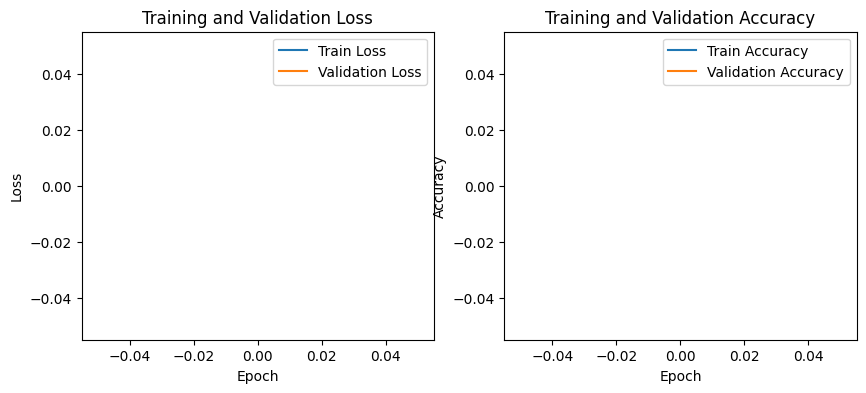

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "Training and Validation Loss", train_losses, val_losses, label="Loss")
plt.subplot(1, 2, 2)
plot_losses(plt, "Training and Validation Accuracy", train_accuracy, val_accuracy, label="Accuracy")
plt.show()

In [ ]:
"""
At the end of the training print out the following:
    - Accuracy of the model on the validation data
    - Number of epochs to get to that accuracy
    - Criterion used
"""
# TODO print the info required above
print()